## RIESGO CREDITICIO

## Serv comp S.A.

### Introducción

Construir un modelo de Machine Learning natural capaz de predecir la probabilidad de cumplimiento de pago.

EL Objetivo es crear un modelo basado en machine learning capaz de identificar el comportamiento financiero del asociado de negocio, permitiendo una probabilidad de cumplimiento o incumplimiento del crédito.

<hr>

### Instalación de Librerias

In [8]:
!pip install scikit-learn==0.20.3 --upgrade

Requirement already up-to-date: scikit-learn==0.20.3 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.20.3)


In [9]:
# Si desea utilizar la biblioteca ** xgboost **, instale la versión 0.71.
!pip install xgboost==0.71 --upgrade

Requirement already up-to-date: xgboost==0.71 in /opt/conda/envs/Python36/lib/python3.6/site-packages (0.71)


In [1]:
import json
import requests
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns


### Descargando el dataset csv desde Github

In [2]:
#!wget --no-check-certificate --content-disposition https://raw.githubusercontent.com/vanderlei-test/dataset/master/reto-4-compu-train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
#url="https://raw.githubusercontent.com/vanderlei-test/dataset/master/reto-4-compu-train.csv"

In [7]:
ruta= "D:/projects/Sol_comp-credito/dataset-master/sol-comp.csv"

In [8]:
#df = pd.read_csv(r'reto-4-compu-train.csv')
#df = pd.read_csv(url)
df = pd.read_csv(ruta)
df.head()

,EFECTIVO,CXC,INVENTARIO,EQ_OFICINA,EQ_TRANSPORTE,TERRENOS_Y_CONSTRUCCIONES,CXP,CONTRIBUCIONES_X_PAGAR,ANTICIPOS_CTE,CAP_SOCIAL,UTILIDADES_ACUMULADAS,UTILIDAD_O_PERDIDA,TOTAL_VENTAS,TOTAL_COMPRAS,UTILIDAD_BRUTA,TOTAL_GASTOS,OBJETIVO
0,NaN,7.710800e+06,NaN,1.237449e+06,2.947057e+05,8.812520e+06,4.547214e+07,239671.50090,1.257907e+06,2356497.733,-6.009930e+06,-6.816681e+06,41309820.53,6.872572e+07,6298390.104,1.505762e+07,Aceptado
1,7.437098e+04,2.213116e+06,NaN,1.335531e+05,4.000109e+05,8.491851e+06,1.573254e+07,94809.20697,6.708985e+05,NaN,-7.980962e+06,-3.342452e+06,NaN,3.588274e+07,NaN,1.085156e+07,Aceptado
2,5.269987e+06,2.893119e+07,3.983352e+05,1.533061e+07,3.478673e+06,-1.393229e+07,NaN,610814.63990,1.009937e+07,1444426.243,NaN,-4.026344e+06,NaN,3.292337e+08,NaN,8.680735e+06,Sospechoso
3,9.092134e+05,1.145092e+07,9.577823e+06,1.068692e+06,1.302021e+06,1.379064e+06,NaN,NaN,2.378928e+06,1236065.779,NaN,-4.567435e+06,76310275.60,NaN,NaN,1.323267e+07,Aceptado
4,9.688669e+05,8.539206e+06,3.898283e+06,4.168733e+05,NaN,-6.297179e+05,7.620711e+06,116647.73960,1.798065e+06,3657339.603,7.702845e+05,-7.110320e+05,62901614.29,3.614260e+07,6850340.403,1.100048e+07,Aceptado


### Acerca del Dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9400 entries, 0 to 9399
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EFECTIVO                   7986 non-null   float64
 1   CXC                        7968 non-null   float64
 2   INVENTARIO                 8000 non-null   float64
 3   EQ_OFICINA                 7945 non-null   float64
 4   EQ_TRANSPORTE              7988 non-null   float64
 5   TERRENOS_Y_CONSTRUCCIONES  8038 non-null   float64
 6   CXP                        7934 non-null   float64
 7   CONTRIBUCIONES_X_PAGAR     8052 non-null   float64
 8   ANTICIPOS_CTE              7976 non-null   float64
 9   CAP_SOCIAL                 8036 non-null   float64
 10  UTILIDADES_ACUMULADAS      7993 non-null   float64
 11  UTILIDAD_O_PERDIDA         8031 non-null   float64
 12  TOTAL_VENTAS               7941 non-null   float64
 13  TOTAL_COMPRAS              7908 non-null   float

Las variables son todas numericas. Solo nuestra variable TARGET (Prestamo aprobado o posible incumplimiento financiero) es the tipo float.

La función describe() de abajo muestra varias estadisticas del dataset.

In [10]:
df.describe()

,EFECTIVO,CXC,INVENTARIO,EQ_OFICINA,EQ_TRANSPORTE,TERRENOS_Y_CONSTRUCCIONES,CXP,CONTRIBUCIONES_X_PAGAR,ANTICIPOS_CTE,CAP_SOCIAL,UTILIDADES_ACUMULADAS,UTILIDAD_O_PERDIDA,TOTAL_VENTAS,TOTAL_COMPRAS,UTILIDAD_BRUTA,TOTAL_GASTOS
count,7.986000e+03,7.968000e+03,8.000000e+03,7.945000e+03,7.988000e+03,8.038000e+03,7.934000e+03,8.052000e+03,7.976000e+03,8.036000e+03,7.993000e+03,8.031000e+03,7.941000e+03,7.908000e+03,7.971000e+03,7.943000e+03
mean,1.720915e+06,1.561073e+07,1.098941e+07,4.341284e+06,1.321588e+06,6.198420e+05,2.275234e+07,4.109997e+05,2.635145e+06,3.325138e+06,4.240122e+06,-2.090086e+06,1.017051e+08,1.211510e+08,1.702067e+07,1.620236e+07
std,5.958844e+06,1.980334e+07,1.541956e+07,1.885512e+07,1.398674e+06,6.202347e+06,2.810091e+07,6.311683e+05,3.828127e+06,4.122756e+06,1.066916e+07,2.439421e+06,1.148423e+08,3.320798e+08,1.710116e+07,1.341951e+07
min,2.591455e+03,3.282261e+01,5.019700e-02,2.974216e+02,1.698222e+02,-1.577708e+07,1.276200e+01,5.638191e+03,4.495763e+00,2.334091e+00,-4.029189e+07,-8.716171e+06,7.154203e+03,1.458903e+05,2.408107e+03,3.979024e+03
25%,1.874601e+05,2.362067e+06,9.281351e+05,1.769855e+05,3.433503e+05,-3.874056e+06,3.711720e+06,1.113298e+05,3.813363e+05,5.629920e+05,-3.025772e+06,-3.824858e+06,2.303181e+07,1.214764e+07,4.836037e+06,6.104123e+06
50%,5.112329e+05,8.255125e+06,4.810330e+06,6.529255e+05,8.630635e+05,1.828932e+06,1.286143e+07,2.288855e+05,1.235872e+06,1.870131e+06,4.119952e+06,-1.629044e+06,6.309045e+07,3.473485e+07,1.181114e+07,1.272461e+07
75%,1.432613e+06,2.160462e+07,1.474278e+07,2.430901e+06,1.827559e+06,5.955197e+06,3.097250e+07,4.690705e+05,3.273238e+06,4.536913e+06,1.140550e+07,-7.368186e+03,1.378293e+08,1.007433e+08,2.352766e+07,2.260017e+07
max,3.343603e+08,2.135761e+08,1.664338e+08,5.913821e+08,1.290365e+07,9.031323e+06,2.644946e+08,1.618323e+07,4.291686e+07,4.116688e+07,4.056842e+07,1.214191e+06,1.151511e+09,1.000136e+10,1.438985e+08,9.763166e+07


<hr>

### Entrenamiento y evaluación de un modelo de clasificación binaria


#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos transform y fit. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación DropColumns para eliminar columnas de un pandas DataFrame.


In [11]:
from sklearn.base import BaseEstimator, TransformerMixin


# All sklearn Transforms must have the `transform` and `fit` methods
class DropColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Primero copiamos el dataframe de datos de entrada 'X'
        data = X.copy()
        # Devolvemos un nuevo dataframe de datos sin las columnas no deseadas
        return data.drop(labels=self.columns, axis='columns')

In [16]:
# Creación de instancias de una transformación DropColumns
#rm_columns = DropColumns(
#    columns=["CXC", "CXP"]  # Esta transformación toma como parámetro una lista con los nombres de las columnas no deseadas
#)

#print(rm_columns)

In [12]:
# Ver las columnas del conjunto de datos original
print("Columnas del conjunto de datos original: \n")
print(df.columns)

# Aplicar la transformación ``DropColumns`` al conjunto de datos base
#rm_columns.fit(X=df)

# Reconstruyendo un DataFrame de Pandas con el resultado de la transformación
#df2 = pd.DataFrame.from_records(
#    data=rm_columns.transform(
##        X=df
#    ),
#)

df2 = df.copy()

# Ver las columnas del conjunto de datos transformado
print("\n\nColumnas del conjunto de datos después de la transformación ``DropColumns``: \n")
print(df2.columns)

Columnas del conjunto de datos original: 

Index(['EFECTIVO', 'CXC', 'INVENTARIO', 'EQ_OFICINA', 'EQ_TRANSPORTE',
       'TERRENOS_Y_CONSTRUCCIONES', 'CXP', 'CONTRIBUCIONES_X_PAGAR',
       'ANTICIPOS_CTE', 'CAP_SOCIAL', 'UTILIDADES_ACUMULADAS',
       'UTILIDAD_O_PERDIDA', 'TOTAL_VENTAS', 'TOTAL_COMPRAS', 'UTILIDAD_BRUTA',
       'TOTAL_GASTOS', 'OBJETIVO'],
      dtype='object')


Columnas del conjunto de datos después de la transformación ``DropColumns``: 

Index(['EFECTIVO', 'CXC', 'INVENTARIO', 'EQ_OFICINA', 'EQ_TRANSPORTE',
       'TERRENOS_Y_CONSTRUCCIONES', 'CXP', 'CONTRIBUCIONES_X_PAGAR',
       'ANTICIPOS_CTE', 'CAP_SOCIAL', 'UTILIDADES_ACUMULADAS',
       'UTILIDAD_O_PERDIDA', 'TOTAL_VENTAS', 'TOTAL_COMPRAS', 'UTILIDAD_BRUTA',
       'TOTAL_GASTOS', 'OBJETIVO'],
      dtype='object')


#### Transformación 2: estandarización de Features

#### Definición de features (Variables Independientes)

En este * ejemplo * usaremos todas las columnas. (Usted debe decidir cuales variables utilizar)

#### División en 80% entrenamiento y 20% pruebas

#### Transformación 3: tratamiento de datos faltantes

Para manejar los datos que faltan en nuestro conjunto de datos, ahora usaremos una transformación lista para usar de la biblioteca scikit-learn, llamada SimpleImputer.

Esta transformación permite varias estrategias para el tratamiento de datos faltantes. La documentación oficial se puede encontrar en: https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

En este ejemplo, simplemente haremos cero todos los valores faltante usted puede escoger otra estrategia ;).

In [13]:
# Crear un objeto ``SimpleImputer``
si = SimpleImputer(
    missing_values=np.nan,  # los valores que faltan son del tipo ``np.nan`` (Pandas estándar)
    strategy='constant',  # la estrategia elegida es cambiar el valor faltante por una constante
    fill_value=0,  # la constante que se usará para completar los valores faltantes es un int64 = 0
    verbose=0,
    copy=True
)

print(si)

SimpleImputer(fill_value=0, strategy='constant')


In [14]:
# Ver los datos faltantes del conjunto de datos antes de la primera transformación (df_data_2)
print("Valores nulos antes de la transformación SimpleImputer: \n\n{}\n".format(df2.isnull().sum(axis = 0)))

# Aplicamos el SimpleImputer ``si`` al conjunto de datos df_data_2 (resultado de la primera transformación)
si.fit(X=df2)

# Reconstrucción de un nuevo DataFrame de Pandas con el conjunto imputado (df_data_3)
df3 = pd.DataFrame.from_records(
    data=si.transform(
        X=df2
    ),  # el resultado SimpleImputer.transform (<< pandas dataframe >>) es lista lista
    columns=df2.columns  # las columnas originales deben conservarse en esta transformación
)

#df3 = df2.copy()

# Ver los datos faltantes del conjunto de datos después de la segunda transformación (SimpleImputer) (df_data_3)
print("\n\nValores nulos en el conjunto de datos después de la transformación SimpleImputer: \n\n{}\n".format(df3.isnull().sum(axis = 0)))

Valores nulos antes de la transformación SimpleImputer: 

EFECTIVO                     1414
CXC                          1432
INVENTARIO                   1400
EQ_OFICINA                   1455
EQ_TRANSPORTE                1412
TERRENOS_Y_CONSTRUCCIONES    1362
CXP                          1466
CONTRIBUCIONES_X_PAGAR       1348
ANTICIPOS_CTE                1424
CAP_SOCIAL                   1364
UTILIDADES_ACUMULADAS        1407
UTILIDAD_O_PERDIDA           1369
TOTAL_VENTAS                 1459
TOTAL_COMPRAS                1492
UTILIDAD_BRUTA               1429
TOTAL_GASTOS                 1457
OBJETIVO                        0
dtype: int64



Valores nulos en el conjunto de datos después de la transformación SimpleImputer: 

EFECTIVO                     0
CXC                          0
INVENTARIO                   0
EQ_OFICINA                   0
EQ_TRANSPORTE                0
TERRENOS_Y_CONSTRUCCIONES    0
CXP                          0
CONTRIBUCIONES_X_PAGAR       0
ANTICIPOS_CTE   

In [15]:

# Definiendo las variables features y target (removed CXC and CXP)

features = df3[
    [
        'EFECTIVO',
        'CXC',
        'INVENTARIO',
        'EQ_OFICINA',
        'EQ_TRANSPORTE',
        'TERRENOS_Y_CONSTRUCCIONES',
        'CXP',
        'CONTRIBUCIONES_X_PAGAR',
        'ANTICIPOS_CTE',
        'CAP_SOCIAL',
        'UTILIDADES_ACUMULADAS',
        'UTILIDAD_O_PERDIDA',
        'TOTAL_VENTAS',
        'TOTAL_COMPRAS',
        'UTILIDAD_BRUTA',
        'TOTAL_GASTOS',
    ]
]
target = df3["OBJETIVO"]  ## No cambie la variable target!

In [16]:
features_names=list(features)

In [17]:
n_features = features.shape[1]
print(n_features)

16


In [18]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=None)

In [19]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Entrenando un modelo ``XGBoost``

In [20]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import gc
from sklearn.metrics import confusion_matrix, f1_score, classification_report, precision_score, recall_score, accuracy_score

from sklearn.model_selection import cross_val_score, KFold


C:\Users\Usuario\Anaconda3\lib\site-packages\dask\dataframe\utils.py:15: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
y_train.values

array(['Aceptado', 'Aceptado', 'Aceptado', ..., 'Aceptado', 'Aceptado',
       'Aceptado'], dtype=object)

In [22]:
xgbc = XGBClassifier(n_estimators=600, max_depth =10, learning_rate = 0.08, scale_pos_weight= 1.6)
print(xgbc)

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.08, max_delta_step=None, max_depth=10,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=600, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1.6, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)


In [23]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.08, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.6, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [24]:
y_pred = xgbc.predict(X_test)

In [25]:
print(y_pred)

['Aceptado' 'Aceptado' 'Aceptado' ... 'Aceptado' 'Aceptado' 'Aceptado']


In [30]:

accuracy = accuracy_score(y_test, y_pred)


Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.975\nPrecision=0.911\nRecall=0.643\nF1 Score=0.7539267015706808')

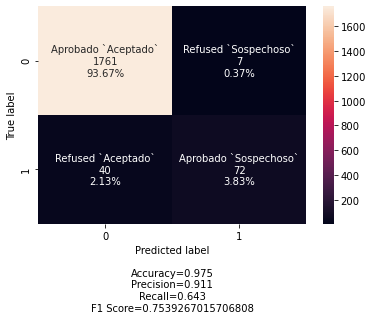

In [29]:
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['Aprobado `Aceptado`', 'Refused `Sospechoso`', 'Refused `Aceptado`', 'Aprobado `Sospechoso`']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt='')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

<hr>

## model Pipeline

In [31]:
pipeline_input = df[
    [
        'EFECTIVO',
        'CXC',
        'INVENTARIO',
        'EQ_OFICINA',
        'EQ_TRANSPORTE',
        'TERRENOS_Y_CONSTRUCCIONES',
        'CXP',
        'CONTRIBUCIONES_X_PAGAR',
        'ANTICIPOS_CTE',
        'CAP_SOCIAL',
        'UTILIDADES_ACUMULADAS',
        'UTILIDAD_O_PERDIDA',
        'TOTAL_VENTAS',
        'TOTAL_COMPRAS',
        'UTILIDAD_BRUTA',
        'TOTAL_GASTOS',
    ]
]

pipeline_target = df['OBJETIVO']

In [32]:
# Separación de los datos en un set de entrenamiento y otro de prueba (PARA CREACION DEL PIPELINE)
X_train, X_test, y_train, y_test = train_test_split(
    pipeline_input,
    pipeline_target,
    test_size=0.3,
    random_state=21233
)

###  definir el pipeline

In [38]:
# Creación de nuestro para almacenamiento en Watson Machine Learning:
my_pipeline = Pipeline(
    steps=[
        ('paso_1_imputer', si),
        ('paso_2_standard_scaler', sc),
        ('su_modelo', XGBClassifier(n_estimators=600, max_depth =10, learning_rate = 0.08, scale_pos_weight= 1.6)),
    ]
)

In [39]:
# Inicializando el Pipeline (pre-procesamiento y entrenamiento del modelo)
my_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('paso_1_imputer', SimpleImputer(copy=True, fill_value=0, missing_values=nan,
       strategy='constant', verbose=0)), ('paso_2_standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('su_modelo', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
     ...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1.6, seed=None,
       silent=True, subsample=1))])

Text(0.5, 15.0, 'Predicted label\n\nAccuracy=0.972\nPrecision=0.813\nRecall=0.673\nF1 Score=0.736')

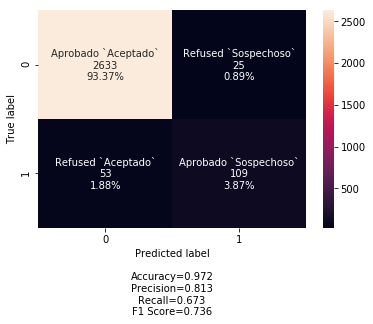

In [40]:
### Haciendo una predicción con el set de prueba

y_pred = my_pipeline.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)
group_names = ['Aprobado `Aceptado`', 'Refused `Sospechoso`', 'Refused `Aceptado`', 'Aprobado `Sospechoso`']
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)
accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
f1_score  = 2*precision*recall / (precision + recall)
sns.heatmap(cf_matrix, annot=labels, fmt='')
stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy, precision, recall, f1_score)
plt.ylabel('True label')
plt.xlabel('Predicted label' + stats_text)

In [41]:
# Precisión simple
my_pipeline.score(X_test, y_test)

0.9723404255319149

#### Estableciendo conexión entre el cliente Python de WML y su instancia del servicio en la nube

In [42]:
# Biblioteca Python con implementación de un cliente HTTP para la API de WML
from watson_machine_learning_client import WatsonMachineLearningAPIClient

Credenciales de instancia WML.


In [43]:
wml_credentials = {
  "apikey": "DMUUEhAVvVcI3cAvYmPRY8PnK9v_G-mZR_8CGzjShwtZ",
  "iam_apikey_description": "Auto-generated for key a77bb085-10db-4772-8866-cc74047154f1",
  "iam_apikey_name": "Credenciales de servicio-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/c463e9c474b14ae88fb8beda6de216ea::serviceid:ServiceId-2e2090d5-d08c-4dfc-ab33-1c5a08f5d57f",
  "instance_id": "1e6c2c41-4acd-4997-a1c6-e65b128ff7e1",
  "url": "https://us-south.ml.cloud.ibm.com"
}

In [44]:
# Instanciando un objeto cliente de Watson Machine Learning a partir de las credenciales

clientWML = WatsonMachineLearningAPIClient(wml_credentials)

In [45]:
# Extrayendo los detalles de su de Watson Machine Learning

instance_details = clientWML.service_instance.get_details()
print(json.dumps(instance_details, indent=4))

{
    "entity": {
        "source": "Bluemix",
        "published_models": {
            "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/published_models"
        },
        "usage": {
            "capacity_units": {
                "current": 0,
                "limit": 180000000
            },
            "computation_time": {
                "current": 0,
                "limit": 180000
            },
            "deployment_count": {
                "current": 0,
                "limit": 5
            },
            "expiration_date": "2020-09-01T00:00:00.000Z",
            "gpu_count_k80": {
                "current": 0,
                "limit": 8
            },
            "gpu_count_p100": {
                "current": 0,
                "limit": 0
            },
            "gpu_count_v100": {
                "current": 0,
                "limit": 0
            },
            "model_count": {
                "current": 0,
         

#### Creando una nueva definición de paquete Python personalizado en WML

In [50]:
# Definición de metadatos del paquete con las Transformaciones personalizadas
pkg_meta = {
    clientWML.runtimes.LibraryMetaNames.NAME: "package_meta_4",
    clientWML.runtimes.LibraryMetaNames.DESCRIPTION: "A custom sklearn transform package",
    clientWML.runtimes.LibraryMetaNames.FILEPATH: "sklearn_transforms.zip",  # Note que estamos utilizando o .zip criado anteriormente!
    clientWML.runtimes.LibraryMetaNames.VERSION: "1.0",
    clientWML.runtimes.LibraryMetaNames.PLATFORM: { "name": "python", "versions": ["3.6"] }
}
custom_package_details = clientWML.runtimes.store_library( pkg_meta )
custom_package_uid = clientWML.runtimes.get_library_uid( custom_package_details )

print("\n Lista de artefactos de runtime almacenados en WML:")
clientWML.repository.list()


 Lista de artefactos de runtime almacenados en WML:
------------------------------------  --------------  ------------------------  ---------  --------------
GUID                                  NAME            CREATED                   FRAMEWORK  TYPE
613864ff-ee42-4fb2-941a-8f1b5dbd06bd  package_meta_4  2020-08-26T19:45:36.925Z  -          python library
------------------------------------  --------------  ------------------------  ---------  --------------


#### Creando una nueva definición de runtime Python personalizado en WML


In [51]:
runtime_meta = {
    clientWML.runtimes.ConfigurationMetaNames.NAME: "runtime_meta_4",
    clientWML.runtimes.ConfigurationMetaNames.DESCRIPTION: "A Python runtime with custom sklearn Transforms",
    clientWML.runtimes.ConfigurationMetaNames.PLATFORM: {
        "name": "python",
        "version": "3.6"
    },
    clientWML.runtimes.ConfigurationMetaNames.LIBRARIES_UIDS: [ custom_package_uid ]
}
runtime_details = clientWML.runtimes.store( runtime_meta )
custom_runtime_uid = clientWML.runtimes.get_uid( runtime_details )

print("\n Detalles del runtime almacenados:")
print(json.dumps(runtime_details, indent=4))


 Detalles del runtime almacenados:
{
    "entity": {
        "name": "runtime_meta_4",
        "description": "A Python runtime with custom sklearn Transforms",
        "custom_libraries": [
            {
                "name": "package_meta_4",
                "url": "https://private.us-south.ml.cloud.ibm.com/v4/libraries/613864ff-ee42-4fb2-941a-8f1b5dbd06bd",
                "version": "1.0"
            }
        ],
        "content_url": "https://private.us-south.ml.cloud.ibm.com/v4/runtimes/69ce5407-dac1-44ac-8f5d-76e6014b7457/content",
        "platform": {
            "name": "python",
            "version": "3.6"
        }
    },
    "metadata": {
        "created_at": "2020-08-26T19:45:40.465Z",
        "guid": "69ce5407-dac1-44ac-8f5d-76e6014b7457",
        "url": "https://us-south.ml.cloud.ibm.com/v4/runtimes/69ce5407-dac1-44ac-8f5d-76e6014b7457"
    }
}


In [52]:
# Listando todos los runtimes almacenados en su WML:
clientWML.runtimes.list()

------------------------------------  --------------  ------------------------  ----------
GUID                                  NAME            CREATED                   PLATFORM
69ce5407-dac1-44ac-8f5d-76e6014b7457  runtime_meta_4  2020-08-26T19:45:40.465Z  python-3.6
------------------------------------  --------------  ------------------------  ----------


####  Pipeline personalizado en WML


In [53]:
model_meta = {
    clientWML.repository.ModelMetaNames.NAME: 'pipeline_meta_4',
    clientWML.repository.ModelMetaNames.DESCRIPTION: "my pipeline for submission",
    clientWML.repository.ModelMetaNames.RUNTIME_UID: custom_runtime_uid
}

In [54]:
# Función para almacenar una definición de Pipeline en WML
stored_model_details = clientWML.repository.store_model(
    model=my_pipeline,  # `my_pipeline` es la variable creada anteriormente que contiene nuestro Pipeline ya entrenado :)
    meta_props=model_meta,  # Metadatos definidos en la celda anterior
    training_data=None  # No altere este parametro
)

print("\n Lista de artefatos almacenados en WML:")
clientWML.repository.list()

# Datalles del modelo hospedado en Watson Machine Learning
print("\n Metadatos del modelo almacenado:")
print(json.dumps(stored_model_details, indent=4))


 Lista de artefatos almacenados en WML:
------------------------------------  ---------------  ------------------------  -----------------  --------------
GUID                                  NAME             CREATED                   FRAMEWORK          TYPE
800c5213-1cc5-443d-b00b-55bbb644ff0f  pipeline_meta_4  2020-08-26T19:45:54.928Z  scikit-learn-0.20  model
613864ff-ee42-4fb2-941a-8f1b5dbd06bd  package_meta_4   2020-08-26T19:45:36.925Z  -                  python library
69ce5407-dac1-44ac-8f5d-76e6014b7457  runtime_meta_4   2020-08-26T19:45:40.465Z  -                  python runtime
------------------------------------  ---------------  ------------------------  -----------------  --------------

 Metadatos del modelo almacenado:
{
    "metadata": {
        "guid": "800c5213-1cc5-443d-b00b-55bbb644ff0f",
        "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/published_models/800c5213-1cc5-443d-b00b-55bbb644ff0f",
        "created_

In [55]:
# El deployment del modelo es finalmente realizado por medio del método ``deployments.create()``

model_deployment_details = clientWML.deployments.create(
    artifact_uid=stored_model_details["metadata"]["guid"],  # No altere este parametro
    name="deployment_meta_4",
    description="Desafio 4 MBTC",
    asynchronous=False,  # No altere este parametro
    deployment_type='online',  # No altere este parametro
    deployment_format='Core ML',  # No altere este parametro
    meta_props=model_meta  # No altere este parametro
)



#######################################################################################

Synchronous deployment creation for uid: '800c5213-1cc5-443d-b00b-55bbb644ff0f' started

#######################################################################################


INITIALIZING
DEPLOY_IN_PROGRESS..
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='927267b5-277e-48fb-8d1d-c5221b76d27a'
------------------------------------------------------------------------------------------------




#### Probando el modelo hospedado en Watson Machine Learning

In [56]:
# Recuperando la URL endpoint dl modelo hospedado en la celda anterior

model_endpoint_url = clientWML.deployments.get_scoring_url(model_deployment_details)
print("La URL de llamada de su API es: {}".format(model_endpoint_url))

La URL de llamada de su API es: https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/deployments/927267b5-277e-48fb-8d1d-c5221b76d27a/online


### ATENCIÓN: UD necesitará de la URL de arriba para entregar su modelo :)

In [57]:
# Detalles del deployment realizado

deployment_details = clientWML.deployments.get_details(
    deployment_uid=model_deployment_details["metadata"]["guid"]  # Este es el ID de su deployment!
)

print("Metadatos del deployment realizado: \n")
print(json.dumps(deployment_details, indent=4))

Metadatos del deployment realizado: 

{
    "metadata": {
        "guid": "927267b5-277e-48fb-8d1d-c5221b76d27a",
        "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/deployments/927267b5-277e-48fb-8d1d-c5221b76d27a",
        "created_at": "2020-08-26T19:46:00.453Z",
        "modified_at": "2020-08-26T19:46:01.167Z"
    },
    "entity": {
        "runtime_environment": "python-3.6",
        "name": "deployment_meta_4",
        "scoring_url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/deployments/927267b5-277e-48fb-8d1d-c5221b76d27a/online",
        "deployable_asset": {
            "name": "pipeline_meta_4",
            "url": "https://us-south.ml.cloud.ibm.com/v3/wml_instances/1e6c2c41-4acd-4997-a1c6-e65b128ff7e1/published_models/800c5213-1cc5-443d-b00b-55bbb644ff0f",
            "guid": "800c5213-1cc5-443d-b00b-55bbb644ff0f",
            "description": "my pipeline for submission",
      

### llamada de API 

In [58]:
scoring_payload = {
    'fields': [
        'EFECTIVO',
        'CXC',
        'INVENTARIO',
        'EQ_OFICINA',
        'EQ_TRANSPORTE',
        'TERRENOS_Y_CONSTRUCCIONES',
        'CXP',
        'CONTRIBUCIONES_X_PAGAR',
        'ANTICIPOS_CTE',
        'CAP_SOCIAL',
        'UTILIDADES_ACUMULADAS',
        'UTILIDAD_O_PERDIDA',
        'TOTAL_VENTAS',
        'TOTAL_COMPRAS',
        'UTILIDAD_BRUTA',
        'TOTAL_GASTOS',
    ],
    'values': [
        [
            968866.8993,
            102102.000,
            8539205.63,
            3898282.548,
            416873.3265,
            1420050.089,
            -629717.8548,
            14613560.64,
            7620711.462,
            116647.7396,
            1798064.624,
            9535423.826,
            3657339.603,
            770284.5004,
            -102101.201,
            -711032.0155
        ]
    ]
}

print("\n Payload de datos a ser clasificado:")
print(json.dumps(scoring_payload, indent=4))


 Payload de datos a ser clasificado:
{
    "fields": [
        "EFECTIVO",
        "CXC",
        "INVENTARIO",
        "EQ_OFICINA",
        "EQ_TRANSPORTE",
        "TERRENOS_Y_CONSTRUCCIONES",
        "CXP",
        "CONTRIBUCIONES_X_PAGAR",
        "ANTICIPOS_CTE",
        "CAP_SOCIAL",
        "UTILIDADES_ACUMULADAS",
        "UTILIDAD_O_PERDIDA",
        "TOTAL_VENTAS",
        "TOTAL_COMPRAS",
        "UTILIDAD_BRUTA",
        "TOTAL_GASTOS"
    ],
    "values": [
        [
            968866.8993,
            102102.0,
            8539205.63,
            3898282.548,
            416873.3265,
            1420050.089,
            -629717.8548,
            14613560.64,
            7620711.462,
            116647.7396,
            1798064.624,
            9535423.826,
            3657339.603,
            770284.5004,
            -102101.201,
            -711032.0155
        ]
    ]
}


In [59]:
result = clientWML.deployments.score(
    model_endpoint_url,
    scoring_payload
)

print("\n Resultados:")
print(json.dumps(result, indent=4))


 Resultados:
{
    "fields": [
        "prediction",
        "probability"
    ],
    "values": [
        [
            "Aceptado",
            [
                0.99932861328125,
                0.0006713927141390741
            ]
        ]
    ]
}
